<a href="https://colab.research.google.com/github/laviniaflorentina/neural_networks_dissertation/blob/master/generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate augmented data for train, validation and test

### Installs

In [0]:
from IPython.display import clear_output

!pip install idx2numpy
clear_output()

### Downloads

In [0]:
import os.path

if not os.path.exists("train-images-idx3-ubyte.gz"):
  !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
  !gunzip train-images-idx3-ubyte.gz
  clear_output(wait=True)

if not os.path.exists("train-labels-idx1-ubyte.gz"):
  !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
  !gunzip train-labels-idx1-ubyte.gz
  clear_output(wait=True)

if not os.path.exists("t10k-images-idx3-ubyte.gz"):
  !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
  !gunzip t10k-images-idx3-ubyte.gz
  clear_output(wait=True)

if not os.path.exists("t10k-labels-idx1-ubyte.gz"):
  !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
  !gunzip t10k-labels-idx1-ubyte.gz
  clear_output(wait=True)

!ls

sample_data		t10k-labels-idx1-ubyte	 train-labels-idx1-ubyte
t10k-images-idx3-ubyte	train-images-idx3-ubyte


### Imports


In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import idx2numpy
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import random

K.set_image_data_format('channels_first')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# rotation = how much to rotate at random
# shift - how much to shift in random direction
# flip - flip hosizonatl and vertical at random
# size=-1 means we augment all data
def augment(images, labels, size=-1, noise_range=0, rotation=0, shift=0):
  # keep track if first digit
  first_digit = True

  first_image = None

  # reshape to be [samples][chanels][width][height]
  images = images.reshape(images.shape[0], 1, images.shape[-1], images.shape[-2])

  # convert from int to float
  images = images.astype('float32')
  
  final_images_regular = []
  final_images_noisy = []
  final_labels = []
  data_generator = ImageDataGenerator(
                             rotation_range=rotation, 
                             width_shift_range=shift, 
                             height_shift_range=shift, 
                             horizontal_flip=False, 
                             vertical_flip=False)
  # for -1 use all data
  if size == -1:
    size = 2 * len(images)
  else:
    size *= 2

  index = 0

  for image, label in data_generator.flow(images, labels, batch_size=1):
    if index == size:
      break

    if (index/2) % 10000 == 0:
      print("\t",int(index/2), "/",int(size/2))

    if first_digit:
      first_image = image[0][0]
      first_label = label[0]

      first_digit = False

    else:
      second_image = image[0][0]
      second_label = label[0]

      large_image = np.concatenate((first_image, second_image), axis=1)
      large_label = first_label * 10 + second_label

      noise_lvl = random.randint(0, noise_range)
      noise = np.random.normal(1,noise_lvl, large_image.shape)

      final_images_regular.append(large_image)
      final_images_noisy.append(large_image + noise)
      final_labels.append(large_label)

      first_digit = True

    index += 1

  return np.array(final_images_regular), np.array(final_images_noisy), final_labels

Using TensorFlow backend.


### Load Data

In [0]:
train_files = ["train-images-idx3-ubyte", "train-labels-idx1-ubyte"]

test_files = ["t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte"]

X_train = idx2numpy.convert_from_file(train_files[0])
y_train = idx2numpy.convert_from_file(train_files[1])

X_test = idx2numpy.convert_from_file(test_files[0])
y_test = idx2numpy.convert_from_file(test_files[1])

print("Train shape",X_train.shape)
print("Test  shape", X_test.shape)

Train shape (60000, 28, 28)
Test  shape (10000, 28, 28)


### Print Sample

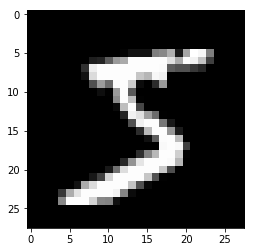

5

In [0]:
# plot image
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()
# label
y_train[0]

### Split train-validation

In [0]:
# split test in validation + test
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=seed)

print("Train shape",X_train.shape)
print("Valid shape",X_validation.shape)

Train shape (54000, 28, 28)
Valid shape (6000, 28, 28)


### Generate Data

In [0]:
X_train_regular, X_train_noisy ,y_train = augment(images=X_train, 
                                                  labels=y_train, 
                                                  size=100000, 
                                                  noise_range=40, 
                                                  rotation=35, 
                                                  shift=0.3)
np.savez("train_double_digits.npz", X_train_regular, X_train_noisy, y_train)
print("Train saved!")
print("Train shape",X_train_regular.shape)

X_valid_regular, X_valid_noisy ,y_valid = augment(images=X_validation, 
                                                  labels=y_validation, 
                                                  size=5000, 
                                                  noise_range=30, 
                                                  rotation=25, 
                                                  shift=0.2)
np.savez("validation_double_digits.npz", X_valid_regular, X_valid_noisy, y_valid)
print("Validation saved!")
print("Validation shape",X_valid_regular.shape)

np.savez("test_single_digits.npz", X_test, y_test)
print("Test saved!")
print("Test shape",X_test.shape)

	 0 / 100000
	 10000 / 100000
	 20000 / 100000
	 30000 / 100000
	 40000 / 100000
	 50000 / 100000
	 60000 / 100000
	 70000 / 100000
	 80000 / 100000
	 90000 / 100000
Train saved!
Train shape (100000, 28, 56)
	 0 / 5000
Validation saved!
Validation shape (5000, 28, 56)
Test saved!
Test shape (10000, 28, 28)


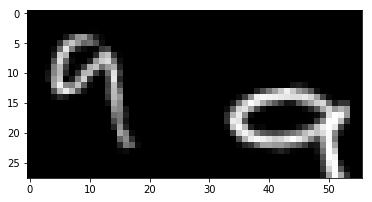

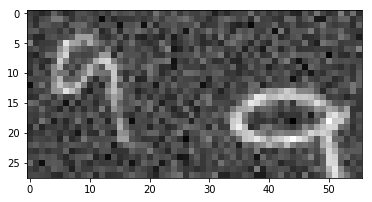

99

In [0]:
i = 0
# plot image
plt.imshow(X_train_regular[i], cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(X_train_noisy[i], cmap=plt.get_cmap('gray'))
plt.show()
# label
y_train[i]

### Load Dataset

In [0]:
npzfile = np.load("train_double_digits.npz")
X_train_regular = npzfile['arr_0']
X_train_noisy = npzfile['arr_1']
y_train = npzfile['arr_2']

npzfile = np.load("validation_double_digits.npz")
X_valid_regular = npzfile['arr_0']
X_valid_noisy = npzfile['arr_1']
y_validation = npzfile['arr_2']

npzfile = np.load("test_single_digits.npz")
X_test = npzfile['arr_0']
y_test = npzfile['arr_1']

print("Train",X_train_regular.shape)
print("Valid",X_valid_regular.shape)
print("Test ",X_test.shape)

Train (100000, 28, 56)
Valid (5000, 28, 56)
Test  (10000, 28, 28)


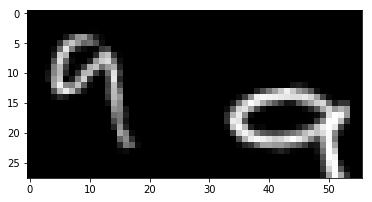

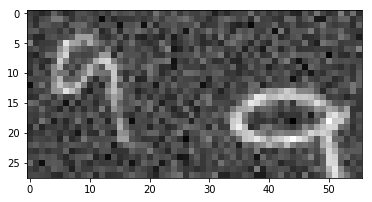

99

In [0]:
i = 0
# plot image
plt.imshow(X_train_regular[i], cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(X_train_noisy[i], cmap=plt.get_cmap('gray'))
plt.show()
# label
y_train[i]